In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#--- Load packages for datasets---
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

#--- Load packages for logistic regression and random forest---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#--- Load packages for train/test split---
from sklearn.model_selection import train_test_split

# Logistic Regression

## Iris dataset

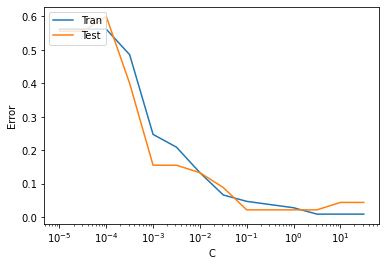

In [20]:
# Load Iris dataset
X, y = load_iris(return_X_y=True)
# Split train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)
tranErrors, testErrors, params = [], [], [] 
for c in np.arange(-5, 2, 0.5):
    # Initialize a logistic regression model
    # Here, you only need to tune the inverse regularization parameter `C`
    lr = LogisticRegression(C=10.**c, random_state=3, max_iter=1000) 
    # Start training
    lr.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - lr.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - lr.score(X_test, y_test))
    params.append(10.**c)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Wine dataset

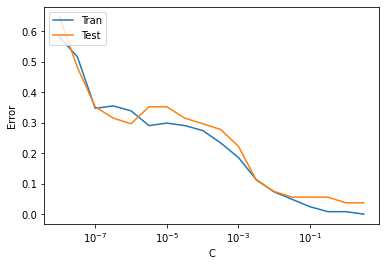

In [24]:
# Load Wine dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 1)
tranErrors, testErrors, params = [], [], [] 
for c in np.arange(-8, 1, 0.5):
    # Initialize a logistic regression model
    # Here, you only need to tune the inverse regularization parameter `C`
    lr = LogisticRegression(C=10.**c, random_state=3, max_iter=4000) 
    # Start training
    lr.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - lr.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - lr.score(X_test, y_test))
    params.append(10.**c)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Random Forest

## Iris dataset:

### tuning max_depth

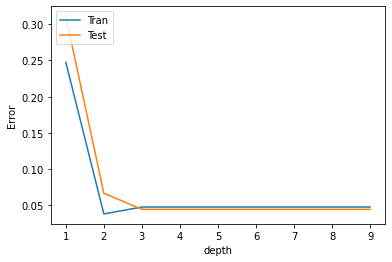

In [300]:
# Load Iris dataset for random forest
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 1)
# Initialize a random forest model
# Here, you need to take turns to tune max_depth/max_samples for showing cases of underfitting/overfitting
# Note that when you tune max_depth, please leave max_samples unchanged!
# Similarly, when you tune max_samples, leave max_depth unchanged!

# tuning the max_depth, leave max_samples unchanged
tranErrors, testErrors, params = [], [], [] 
for depth in np.arange(1, 10, 1):
    # Initialize a random forest model
    rf = RandomForestClassifier(max_depth=depth, max_samples=10, n_estimators=3, random_state=3)
    # Start training
    rf.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - rf.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - rf.score(X_test, y_test))
    params.append(depth)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('depth')
plt.legend(loc='upper left')
plt.show()

### tuning max_sample (underfitting)

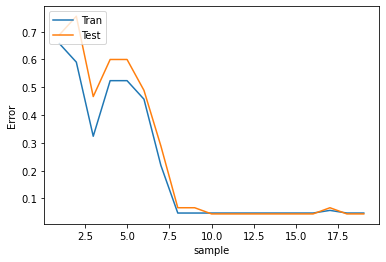

In [321]:
# Load Iris dataset for random forest
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 1)

# tuning the max_samples, leave max_depth unchanged
tranErrors, testErrors, params = [], [], [] 
for sample in np.arange(1, 20, 1):
    # Initialize a random forest model
    rf = RandomForestClassifier(max_depth=10, max_samples=sample, n_estimators=3, random_state=3)
    # Start training
    rf.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - rf.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - rf.score(X_test, y_test))
    params.append(sample)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('sample')
plt.legend(loc='upper left')
plt.show()

### tuning max_sample (overfitting)

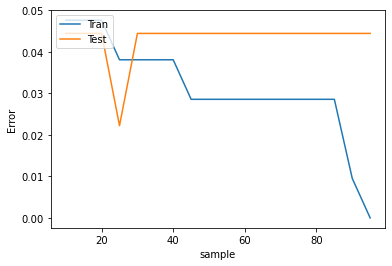

In [17]:
# Load Iris dataset for random forest
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 1)

# tuning the max_samples, leave max_depth unchanged
tranErrors, testErrors, params = [], [], [] 
for sample in np.arange(10, 100, 5):
    # Initialize a random forest model
    rf = RandomForestClassifier(max_depth=10, max_samples=sample, n_estimators=3, random_state=3)
    # Start training
    rf.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - rf.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - rf.score(X_test, y_test))
    params.append(sample)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('sample')
plt.legend(loc='upper left')
plt.show()

## Breast Cancer dataset:

### tuning max_depth

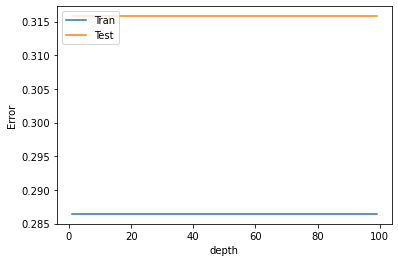

In [19]:
# Load Breast Cancer dataset for random forest
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)

# tuning the max_depth, leave max_sample unchanged
tranErrors, testErrors, params = [], [], [] 
for depth in np.arange(1, 100, 1):
    # Initialize a random forest model
    rf = RandomForestClassifier(max_depth=depth, max_samples=10, n_estimators=3, random_state=3)
    # Start training
    rf.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - rf.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - rf.score(X_test, y_test))
    params.append(depth)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('depth')
plt.legend(loc='upper left')
plt.show()

### tuning max_sample (underfitting)

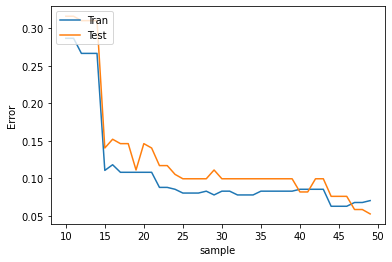

In [15]:
# Load Breast Cancer dataset for random forest
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)

# tuning the max_sample, leave max_depth unchanged
tranErrors, testErrors, params = [], [], [] 
for sample in np.arange(10, 50, 1):
    # Initialize a random forest model
    rf = RandomForestClassifier(max_depth=10, max_samples=sample, n_estimators=3, random_state=3)
    # Start training
    rf.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - rf.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - rf.score(X_test, y_test))
    params.append(sample)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('sample')
plt.legend(loc='upper left')
plt.show()

### tuning max_sample (overfitting)

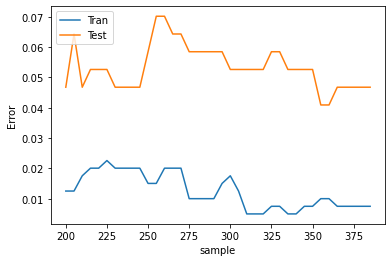

In [13]:
# Load Breast Cancer dataset for random forest
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)

# tuning the max_sample, leave max_depth unchanged
tranErrors, testErrors, params = [], [], [] 
for sample in np.arange(200, 390, 5):
    # Initialize a random forest model
    rf = RandomForestClassifier(max_depth=10, max_samples=sample, n_estimators=3, random_state=3)
    # Start training
    rf.fit(X_train, y_train)
    # Show training set error
    tranErrors.append(1 - rf.score(X_train, y_train))
    # Show testing set error
    testErrors.append(1 - rf.score(X_test, y_test))
    params.append(sample)
plt.plot(params, tranErrors, label = 'Tran')
plt.plot(params, testErrors, label = 'Test')
plt.ylabel('Error')
plt.xlabel('sample')
plt.legend(loc='upper left')
plt.show()

In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

<ipython-input-27-d68dbf626840>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


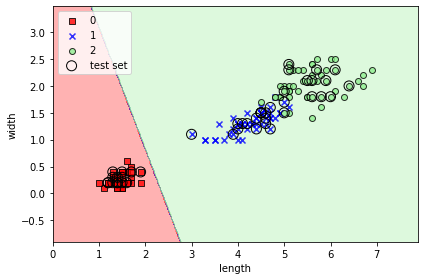

In [28]:
import pandas as pd
import numpy as np

#--- Load packages for datasets---
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

#--- Load packages for train/test split---
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 1)
lr = LogisticRegression(C=0.0001, random_state=3, max_iter=1000)
lr.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('length')
plt.ylabel('width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

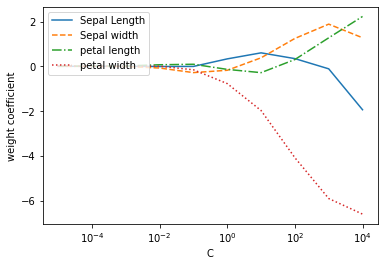

In [29]:
X, y = load_iris(return_X_y=True)
# Split train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, max_iter=1000)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Sepal Length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Sepal width')
plt.plot(params, weights[:, 2], linestyle='-.',
         label='petal length')
plt.plot(params, weights[:, 3], linestyle=':',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()